# COMP377: AI for Software Developers
## Assignment 2: Logistic Regression
### Exercise 1

Name: Wenjie Zhou

Student ID: 301337168

Date: October 16, 2024

File Name: WenjieZhou_COMP377Lab2_Ex1

### Instructions

1.  Complete the code in the cells provided according to the instructions given in the comments.
2.  Ensure that your code runs without errors.
3.  Submit your completed notebook via eCentennial.


### Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from ucimlrepo import fetch_ucirepo

### Part 1: Data Loading

In [9]:
## Part 1: Data Loading ##

# Load the data from the UCI repository
student_performance = fetch_ucirepo(id=320)

# Assign the features and target to X and y
X = student_performance.data.features
y = student_performance.data.targets['G3']

# Convert G3 (final grade) into a binary outcome (pass/fail) assuming passing grade >= 10
y = (y >= 10).astype(int)

### Part 2: Data Preprocessing

In [10]:
## Part 2: Data Pre-processing ##

# Split the data by 80/20 rule due to the small size of the dataset (649 samples)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify the categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

# Create a preprocessor object to scale numerical features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

### Part 3: Create and Train Model

In [11]:
## Part 3: Model Training ###

# Create a Logistic Regression model using a pipeline
log_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Train the model
log_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))])),
                ('classifier', LogisticRegression())])

### Part 4: Test Model

In [12]:
### Part 4: Model Evaluation ###

# Make predictions on the test set
y_pred = log_model.predict(X_test)
y_pred_proba = log_model.predict_proba(X_test)[:, 1]

### Part 5: Calculate Accuracy & Accuracy

In [13]:
### Part 5: Model Accuracy ###

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Accuracy: 0.88
Precision: 0.92
Recall: 0.95
ROC AUC: 0.79


### Visualization and Display (Optional)

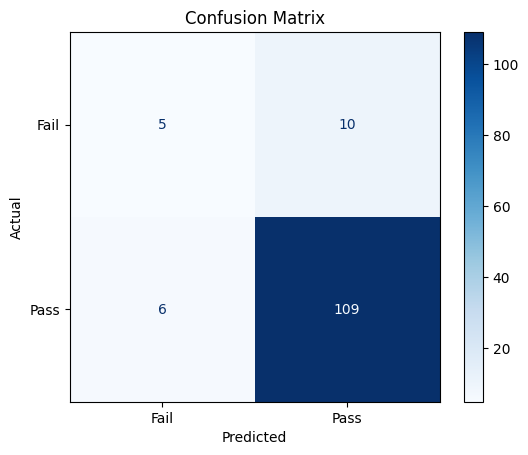

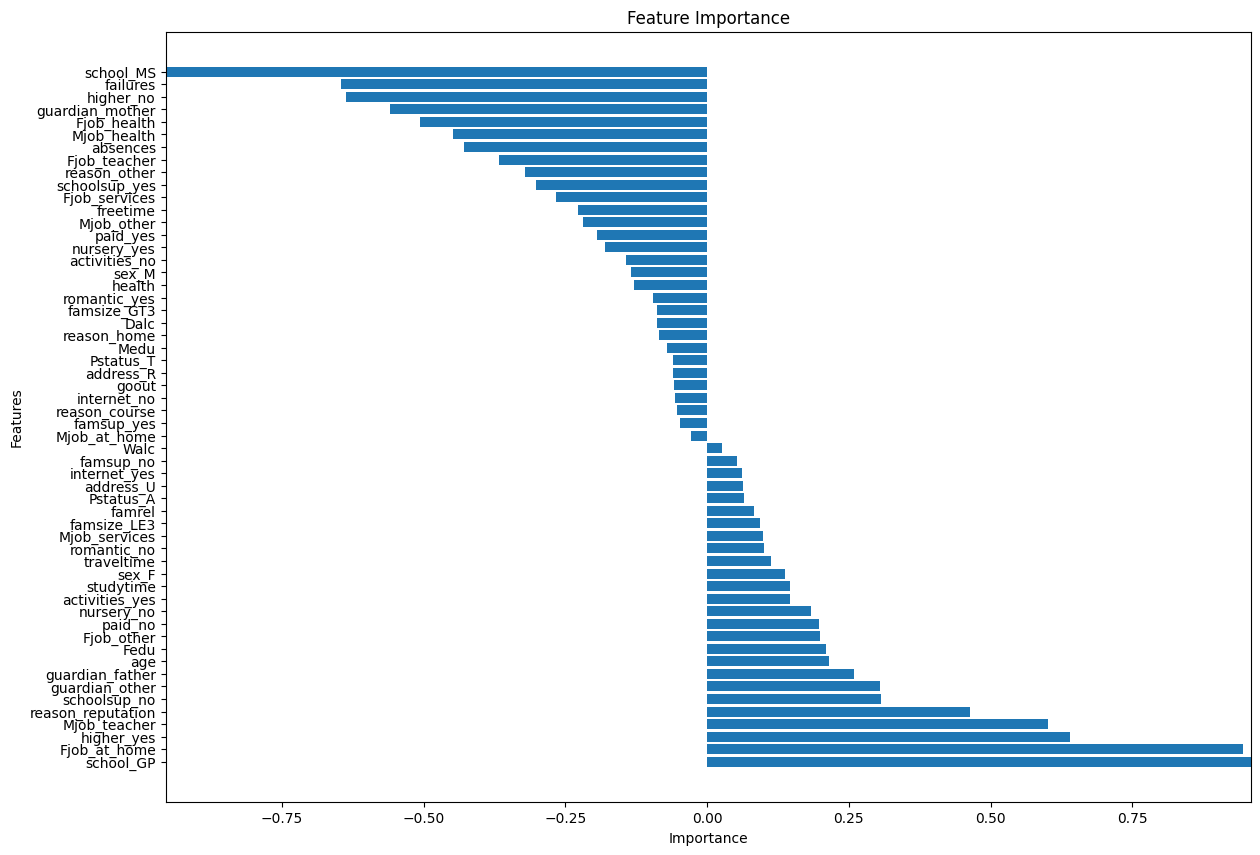

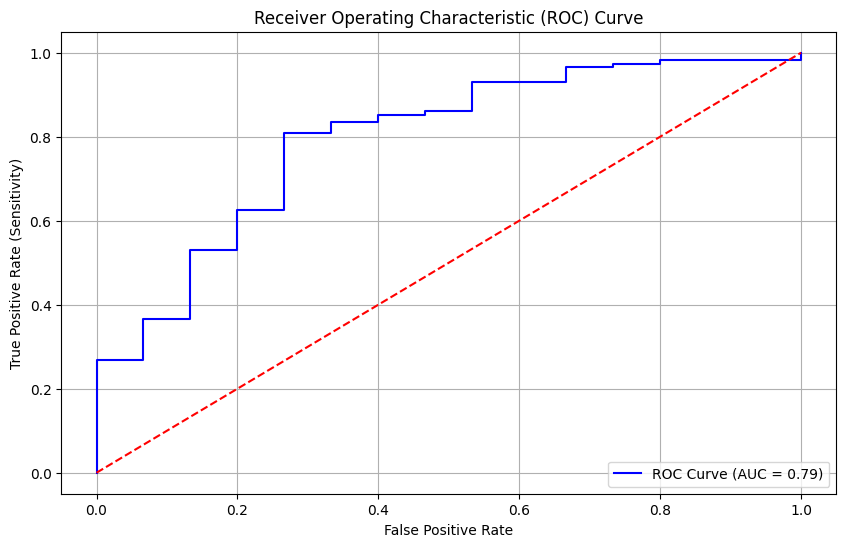

In [14]:
### Visualization & Display ###

## Print Results to the Screen ###

# Confusion Matrix
# Display performance of the model in terms of true positives, false positives, true negatives, and false negatives.
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fail', 'Pass']).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance
# Extract the feature importance indicating the influence of each feature on the model's predictions.
feature_names = numerical_features.tolist() + list(log_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))
importance = log_model.named_steps['classifier'].coef_[0]
indices = np.argsort(importance)[::-1]
plt.figure(figsize=(14, 10))
plt.title("Feature Importance")
plt.barh(np.array(feature_names)[indices], importance[indices], align="center", height=0.8)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.xlim([min(importance[indices]), max(importance[indices])])
plt.show()

# ROC Curve
# Plot the Receiver Operating Characteristic (ROC) curve to visualize the trade-off between true positive rate and false positive rate.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Summary and Conclusions

Accuracy: 0.88

Precision: 0.92

Recall: 0.95

ROC AUC: 0.79

The model shows strong performance with an accuracy of 0.88, indicating that 88% of predictions are correct. The precision of 0.92 means that 92% of predicted passing students are accurate, while a recall of 0.95 indicates effective identification of actual passing students, minimizing false negatives. However, the AUC score of 0.79 suggests room for improvement in distinguishing between passing and failing students.

To enhance model performance, we may consider feature engineering to capture more complex relationships and explore advanced models like Random Forests or Gradient Boosting. Hyperparameter tuning can optimize parameters, and techniques like SMOTE can address class imbalance if present. Implementing k-fold cross-validation will ensure model stability, while adjusting the classification threshold can help optimize precision and recall.